In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes_1.csv")
df.shape

(520, 17)

In [4]:
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Check the counts of categorical features

In [6]:
for column in df.columns:
    if column != "Age" :
        unique_counts = df[column].value_counts()
        print(f"Unique counts of {column}:")
        print(unique_counts)
        print()

Unique counts of Gender:
Gender
Male      328
Female    192
Name: count, dtype: int64

Unique counts of Polyuria:
Polyuria
No     262
Yes    258
Name: count, dtype: int64

Unique counts of Polydipsia:
Polydipsia
No     287
Yes    233
Name: count, dtype: int64

Unique counts of sudden weight loss:
sudden weight loss
No     303
Yes    217
Name: count, dtype: int64

Unique counts of weakness:
weakness
Yes    305
No     215
Name: count, dtype: int64

Unique counts of Polyphagia:
Polyphagia
No     283
Yes    237
Name: count, dtype: int64

Unique counts of Genital thrush:
Genital thrush
No     404
Yes    116
Name: count, dtype: int64

Unique counts of visual blurring:
visual blurring
No     287
Yes    233
Name: count, dtype: int64

Unique counts of Itching:
Itching
No     267
Yes    253
Name: count, dtype: int64

Unique counts of Irritability:
Irritability
No     394
Yes    126
Name: count, dtype: int64

Unique counts of delayed healing:
delayed healing
No     281
Yes    239
Name: count, dty

Visualize the categorical features

C:\Users\user\AppData\Local\Temp\ipykernel_12836\448192685.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\user\AppData\Local\Temp\ipykernel_12836\448192685.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\user\AppData\Local\Temp\ipykernel_12836\448192685.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\user\AppData\Local\Temp\ipykernel_12836\448192685.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\user\AppData\Local\Temp\ipykernel_12836\448192685.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax

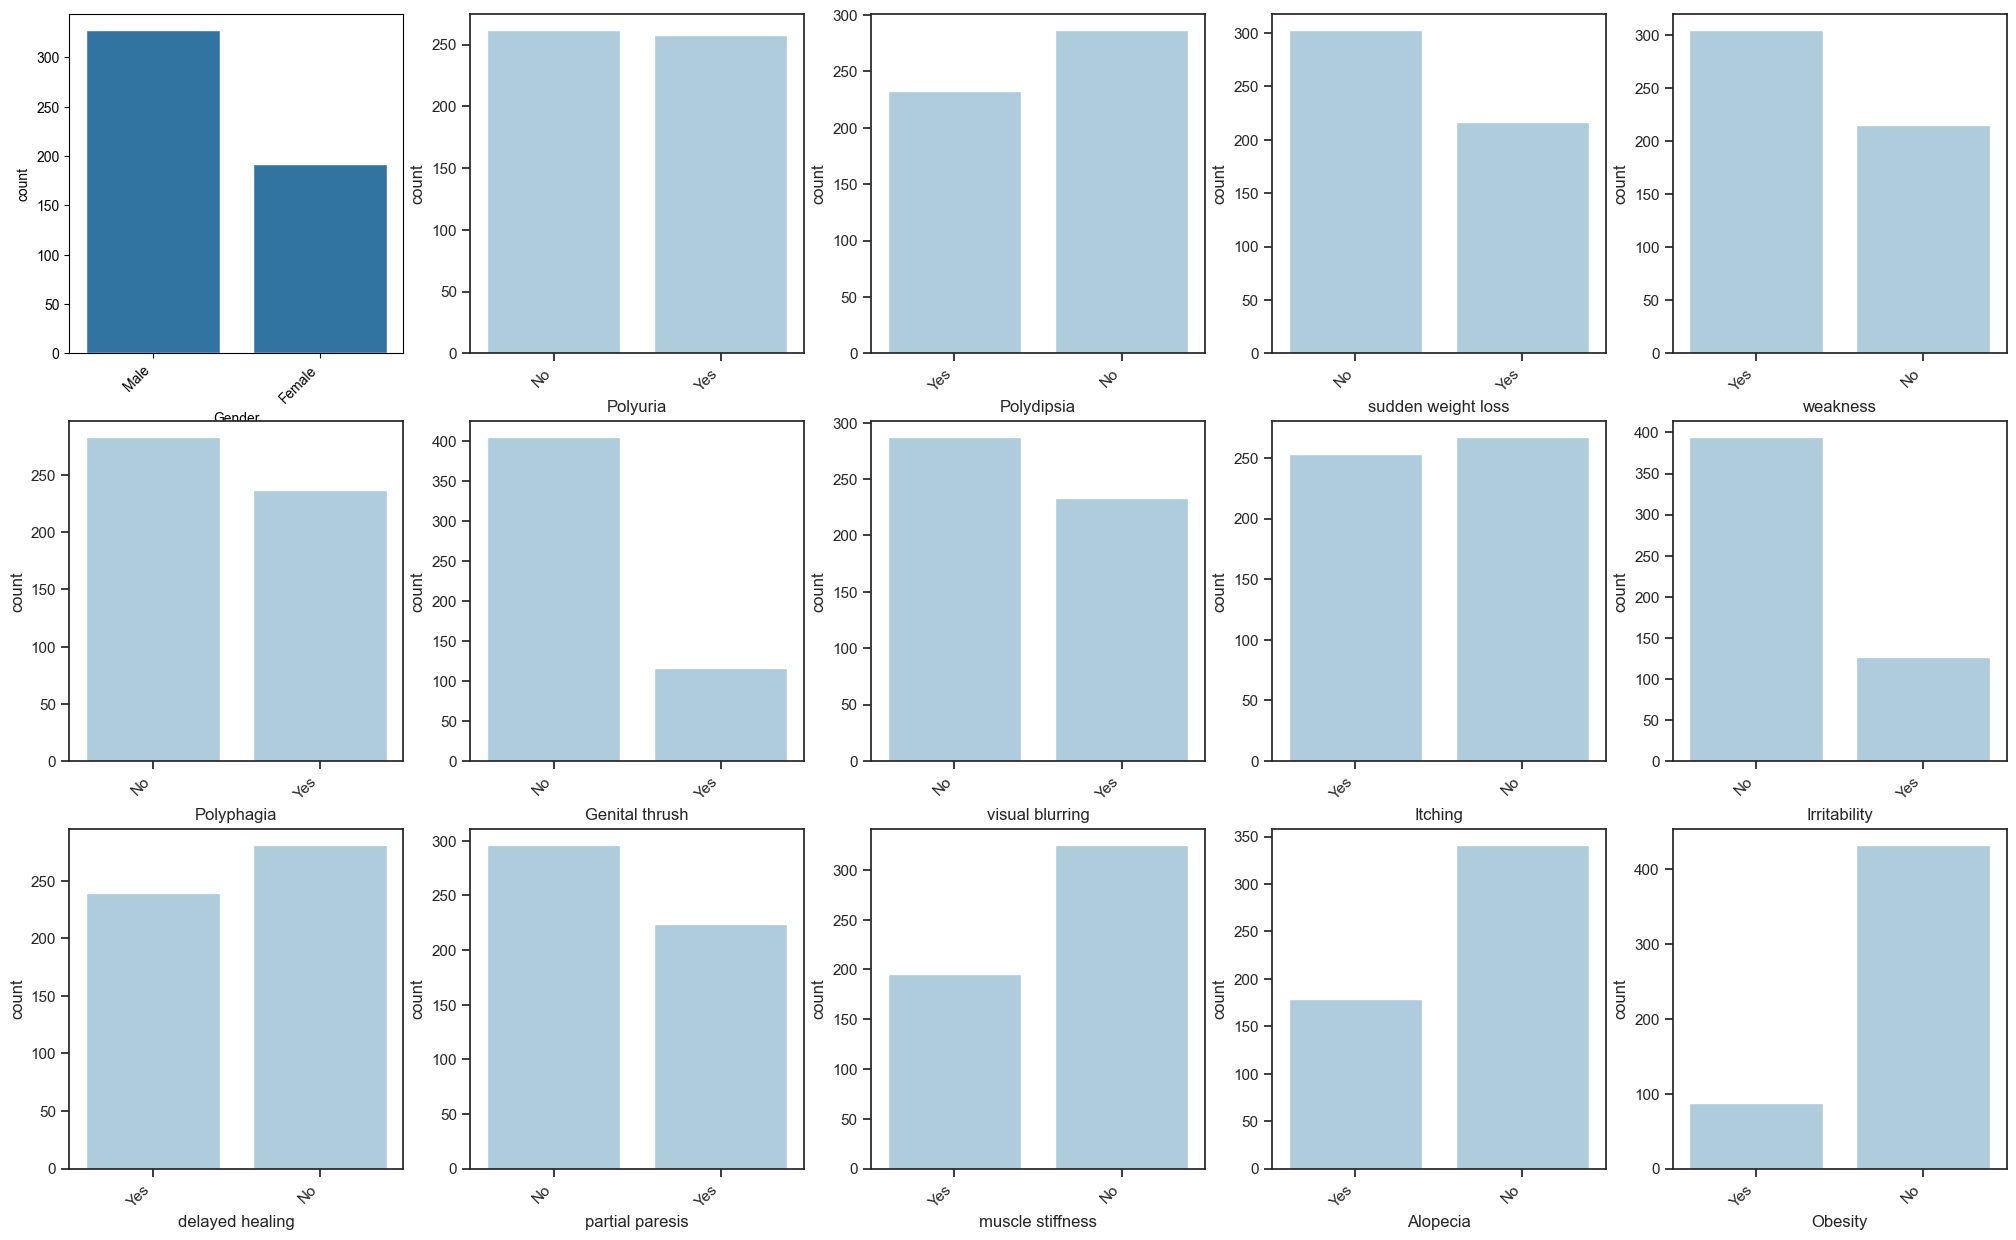

In [7]:
categorical_features = df.select_dtypes(include=[object])
categorical_features = categorical_features.drop(['class'], axis = 1)

plt.figure(figsize = (25,15))
for i, feature in enumerate(categorical_features):
      plt.subplot(3,5,i + 1)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)#, hue = 'Stroke')#, color='#221C35')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


Vizualize the data distributions of numarical features

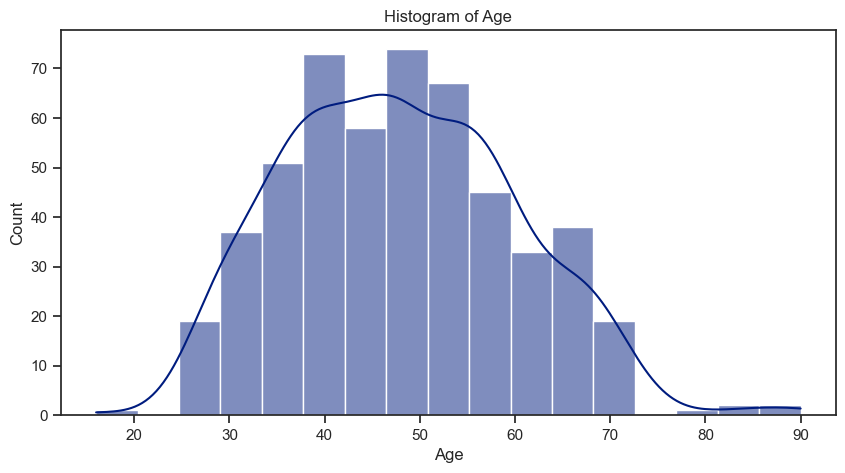

In [8]:
numeric_features = df.select_dtypes(include=[np.number])

plt.figure(figsize = (10,5))
for i, feature in enumerate(numeric_features.columns):
    #plt.subplot(1,5,i + 1)
    sns.set(palette='dark')
    sns.set_style("ticks")
    sns.histplot(df[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title('Histogram of Age')

Visualize the class variable

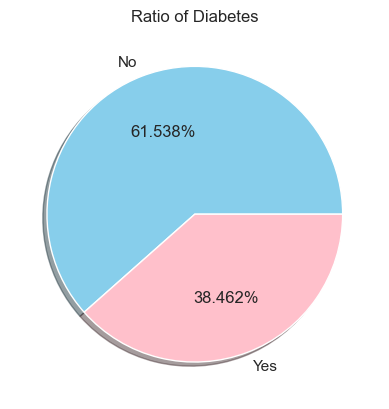

In [9]:
plt.pie(x = df['class'].value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'pink'], shadow=True)
plt.title('Ratio of Diabetes')
plt.show()

Check null values 

In [10]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Label encoding

In [11]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [12]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# for column in df.columns:
#     if column != "Age" :
#         df[column] = encoder.fit_transform(df[column])


In [13]:
from sklearn.preprocessing import LabelEncoder 

label_encoders = {
    'Gender': LabelEncoder(),
    'Polyuria': LabelEncoder(),
    'Polydipsia': LabelEncoder(),
    'sudden weight loss': LabelEncoder(),
    'weakness': LabelEncoder(),
    'Polyphagia': LabelEncoder(),
    'Genital thrush': LabelEncoder(),
    'visual blurring': LabelEncoder(),
    'Itching': LabelEncoder(),
    'Irritability': LabelEncoder(),
    'delayed healing': LabelEncoder(),
    'partial paresis': LabelEncoder(),
    'muscle stiffness': LabelEncoder(),
    'Alopecia': LabelEncoder(),
    'Obesity': LabelEncoder(),
    'class': LabelEncoder()
}

for column, encoder in label_encoders.items():
    df[column] = encoder.fit_transform(df[column])


In [14]:
df.dtypes

Age                   int64
Gender                int32
Polyuria              int32
Polydipsia            int32
sudden weight loss    int32
weakness              int32
Polyphagia            int32
Genital thrush        int32
visual blurring       int32
Itching               int32
Irritability          int32
delayed healing       int32
partial paresis       int32
muscle stiffness      int32
Alopecia              int32
Obesity               int32
class                 int32
dtype: object

In [15]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [16]:
import pickle

with open('Diabetes-label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

Apply Scaling to the dataset

In [17]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

columns_to_scale = ['Age']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [18]:
with open('scaler-Diabetes.pkl', 'wb') as scaler_file:
    pickle.dump(standardScaler, scaler_file)

In [19]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Check the correlation table and correlation Matrix

In [20]:
correlation_table = df.corr()
correlation_table

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


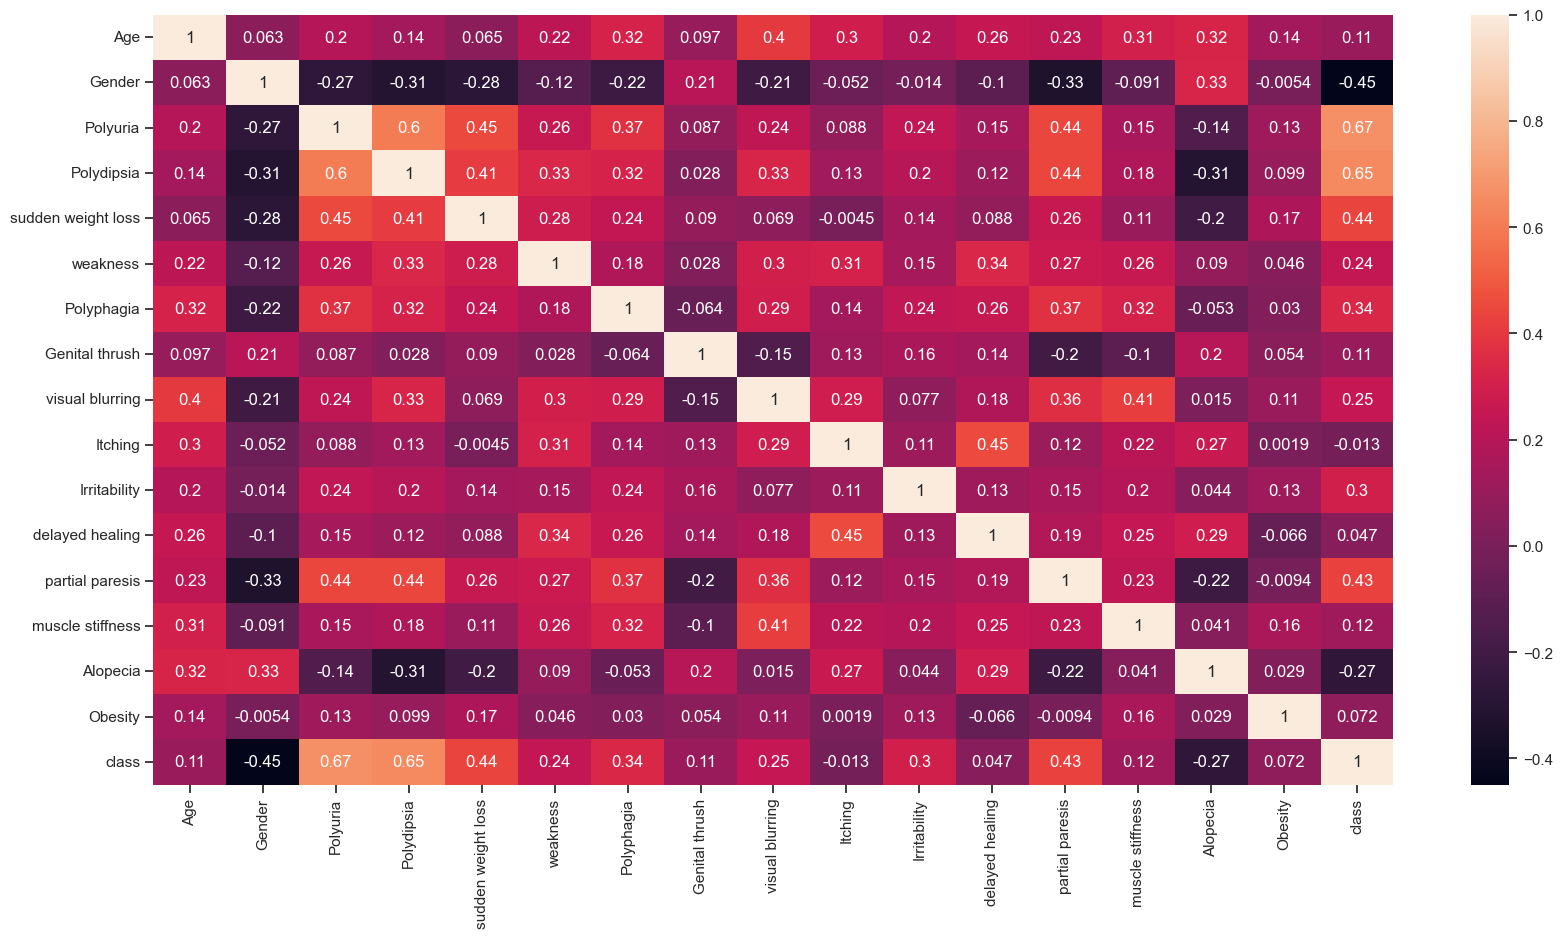

In [21]:
plt.figure(figsize = (20,10))
corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Divide the dataset into data and target

In [22]:
x = df.drop(columns=['class']) 
y = df['class']

data=x.values
target=y.values

Splite the data and target into training and testing

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

DecisionTree Classifier

Testing Data-----------

The accuracy score of DecisionTreeClassifier is 0.9615384615384616

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.94      1.00      0.97        34

    accuracy                           0.96        52
   macro avg       0.97      0.94      0.96        52
weighted avg       0.96      0.96      0.96        52


The AUC-ROC score is 0.9444444444444444



Confusion Matrix:


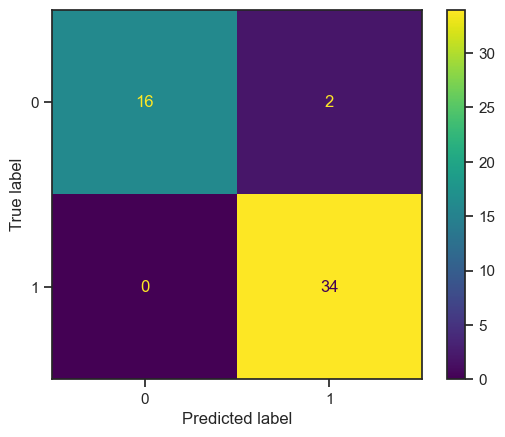

In [25]:
from sklearn.tree import DecisionTreeClassifier

dts = DecisionTreeClassifier()
dts.fit(X_train, y_train)

y_pred_dts = dts.predict(X_test)

y_train_pred__dts = dts.predict(X_train)

print("Testing Data-----------")
print()
print("The accuracy score of DecisionTreeClassifier is {}".format(accuracy_score(y_test, y_pred_dts)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_dts))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred_dts)))
print()

c_matrix = confusion_matrix(y_test, y_pred_dts)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()
print()

# print("Training Data-------")
# print()
# print("The accuracy score of DecisionTreeClassifier is {}".format(accuracy_score(y_train, y_train_pred__dts)))
# print()
# print("Classification Report:")
# print(classification_report(y_train, y_train_pred__dts))
# print()
# print("The AUC-ROC score is {}".format(roc_auc_score(y_train, y_train_pred__dts)))

RandomForest Classifier

The accuracy score of Random Forest Classifier is 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        34

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52


The AUC-ROC score is 1.0

Confusion Matrix:


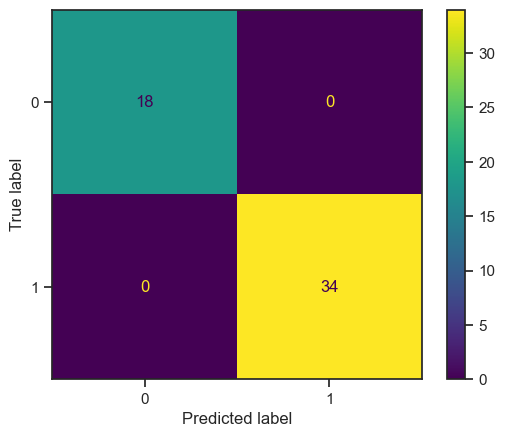

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred_rfc)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred_rfc)))
print()

c_matrix = confusion_matrix(y_test, y_pred_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()
print()

GradientBoosting Classifier

The accuracy score of GradientBoosting Classifier is 0.9807692307692307

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.97      1.00      0.99        34

    accuracy                           0.98        52
   macro avg       0.99      0.97      0.98        52
weighted avg       0.98      0.98      0.98        52


The AUC-ROC score is 0.9722222222222222

Confusion Matrix:


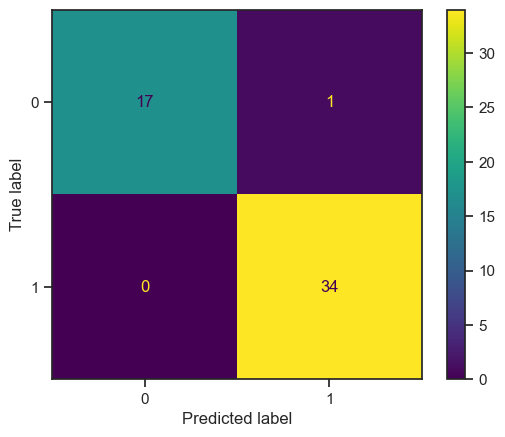

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print("The accuracy score of GradientBoosting Classifier is {}".format(accuracy_score(y_test, y_pred_gbc)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred_gbc)))
print()

c_matrix = confusion_matrix(y_test, y_pred_gbc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()
print()

KNeighbors Classifier

The accuracy score of KNeighbors Classifier is 0.8653846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.79      0.89        34

    accuracy                           0.87        52
   macro avg       0.86      0.90      0.86        52
weighted avg       0.90      0.87      0.87        52


The AUC-ROC score is 0.8970588235294117

Confusion Matrix:


h:\Esoft Projects\Esoft Final Project\Final Project\ResearchPartBackendNew\CS\App\CSvenv\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


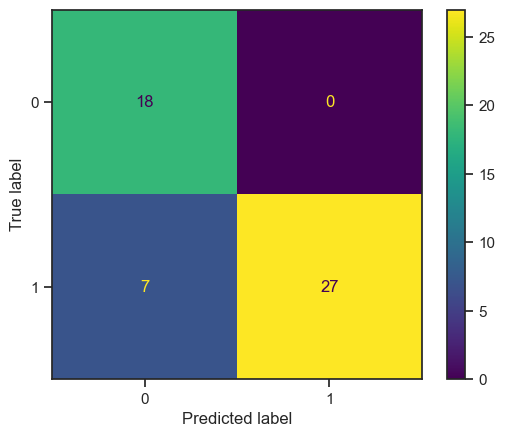

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("The accuracy score of KNeighbors Classifier is {}".format(accuracy_score(y_test, y_pred_knn)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred_knn)))
print()

c_matrix = confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()
print()

In [29]:
pickle.dump(dts,open('Diabetes-Model.pkl','wb'))

Testing Results

In [30]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dts})
result.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [31]:
test_data=[[0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1]]

test_data=np.array(test_data)

result=dts.predict(test_data)
print(result)

[1]


Testing for backend

In [32]:
Age = 40
Gender = "Male"
Polyuria = "No"
Polydipsia = "Yes"
Sudden_weight_loss = "No"
Weakness = "Yes"
Polyphagia = "No"
Genital_thrush = "No"
Visual_blurring = "No"
Itching = "Yes"
Irritability = "No"
Delayed_healing = "Yes"
Partial_paresis = "No"
Muscle_stiffness = "Yes"
Alopecia = "Yes"
Obesity = "Yes"

In [33]:
	data = [[Age,Gender,Polyuria,Polydipsia,Sudden_weight_loss,Weakness,Polyphagia,Genital_thrush,Visual_blurring,Itching,Irritability,Delayed_healing,Partial_paresis,Muscle_stiffness,Alopecia,Obesity]]
	df_Diabetes = pd.DataFrame(data,  columns = ['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity'])

In [34]:
df_Diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes


In [35]:
scaler_Diabetes=pickle.load(open('scaler-Diabetes.pkl','rb'))

columns_to_scale = ['Age']

df_Diabetes[columns_to_scale] = scaler_Diabetes.transform(df_Diabetes[columns_to_scale])

In [36]:
Diabetes_label_encoders=pickle.load(open('Diabetes-label_encoders.pkl','rb'))

for column, encoder in Diabetes_label_encoders.items():
    if column in df_Diabetes.columns:
	    df_Diabetes[column] = encoder.transform(df_Diabetes[column])
				

In [37]:
df_Diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1


In [38]:
Diabetes_Model=pickle.load(open('Diabetes-Model.pkl','rb'))

y_pred_new = Diabetes_Model.predict(X_test)

result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_new})
result.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
